In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re

import pickle
from tqdm import tqdm
import os

In [3]:
df_heart = pd.read_csv('D:/Data_Practice/heart.csv')
df_heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
print(df_heart.age.value_counts())
print(df_heart.sex.value_counts())
print(df_heart.cp.value_counts())
print(df_heart.trestbps.value_counts())
print(df_heart.chol.value_counts())
print(df_heart.fbs.value_counts())
print(df_heart.restecg.value_counts())
print(df_heart.thalach.value_counts())
print(df_heart.exang.value_counts())
print(df_heart.oldpeak.value_counts())
print(df_heart.slope.value_counts())
print(df_heart.ca.value_counts())
print(df_heart.thal.value_counts())
print(df_heart.target.value_counts())

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64
1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trestbps, 

In [5]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
tar_corr=df_heart.corr()['target']

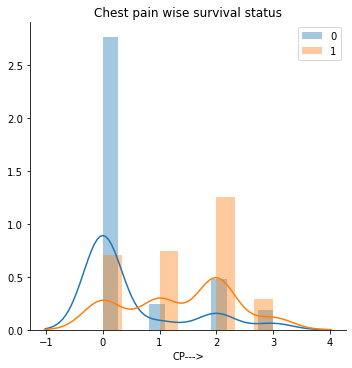

In [8]:
#Univariate Analysis - Histogram with PDF
sns.set_style
('whitegrid')
g=sns.FacetGrid(df_heart,hue='target',height=5)
g=g.map(sns.distplot,'cp')
plt.title('Chest pain wise survival status')
plt.xlabel('CP--->')
plt.legend()
plt.show()

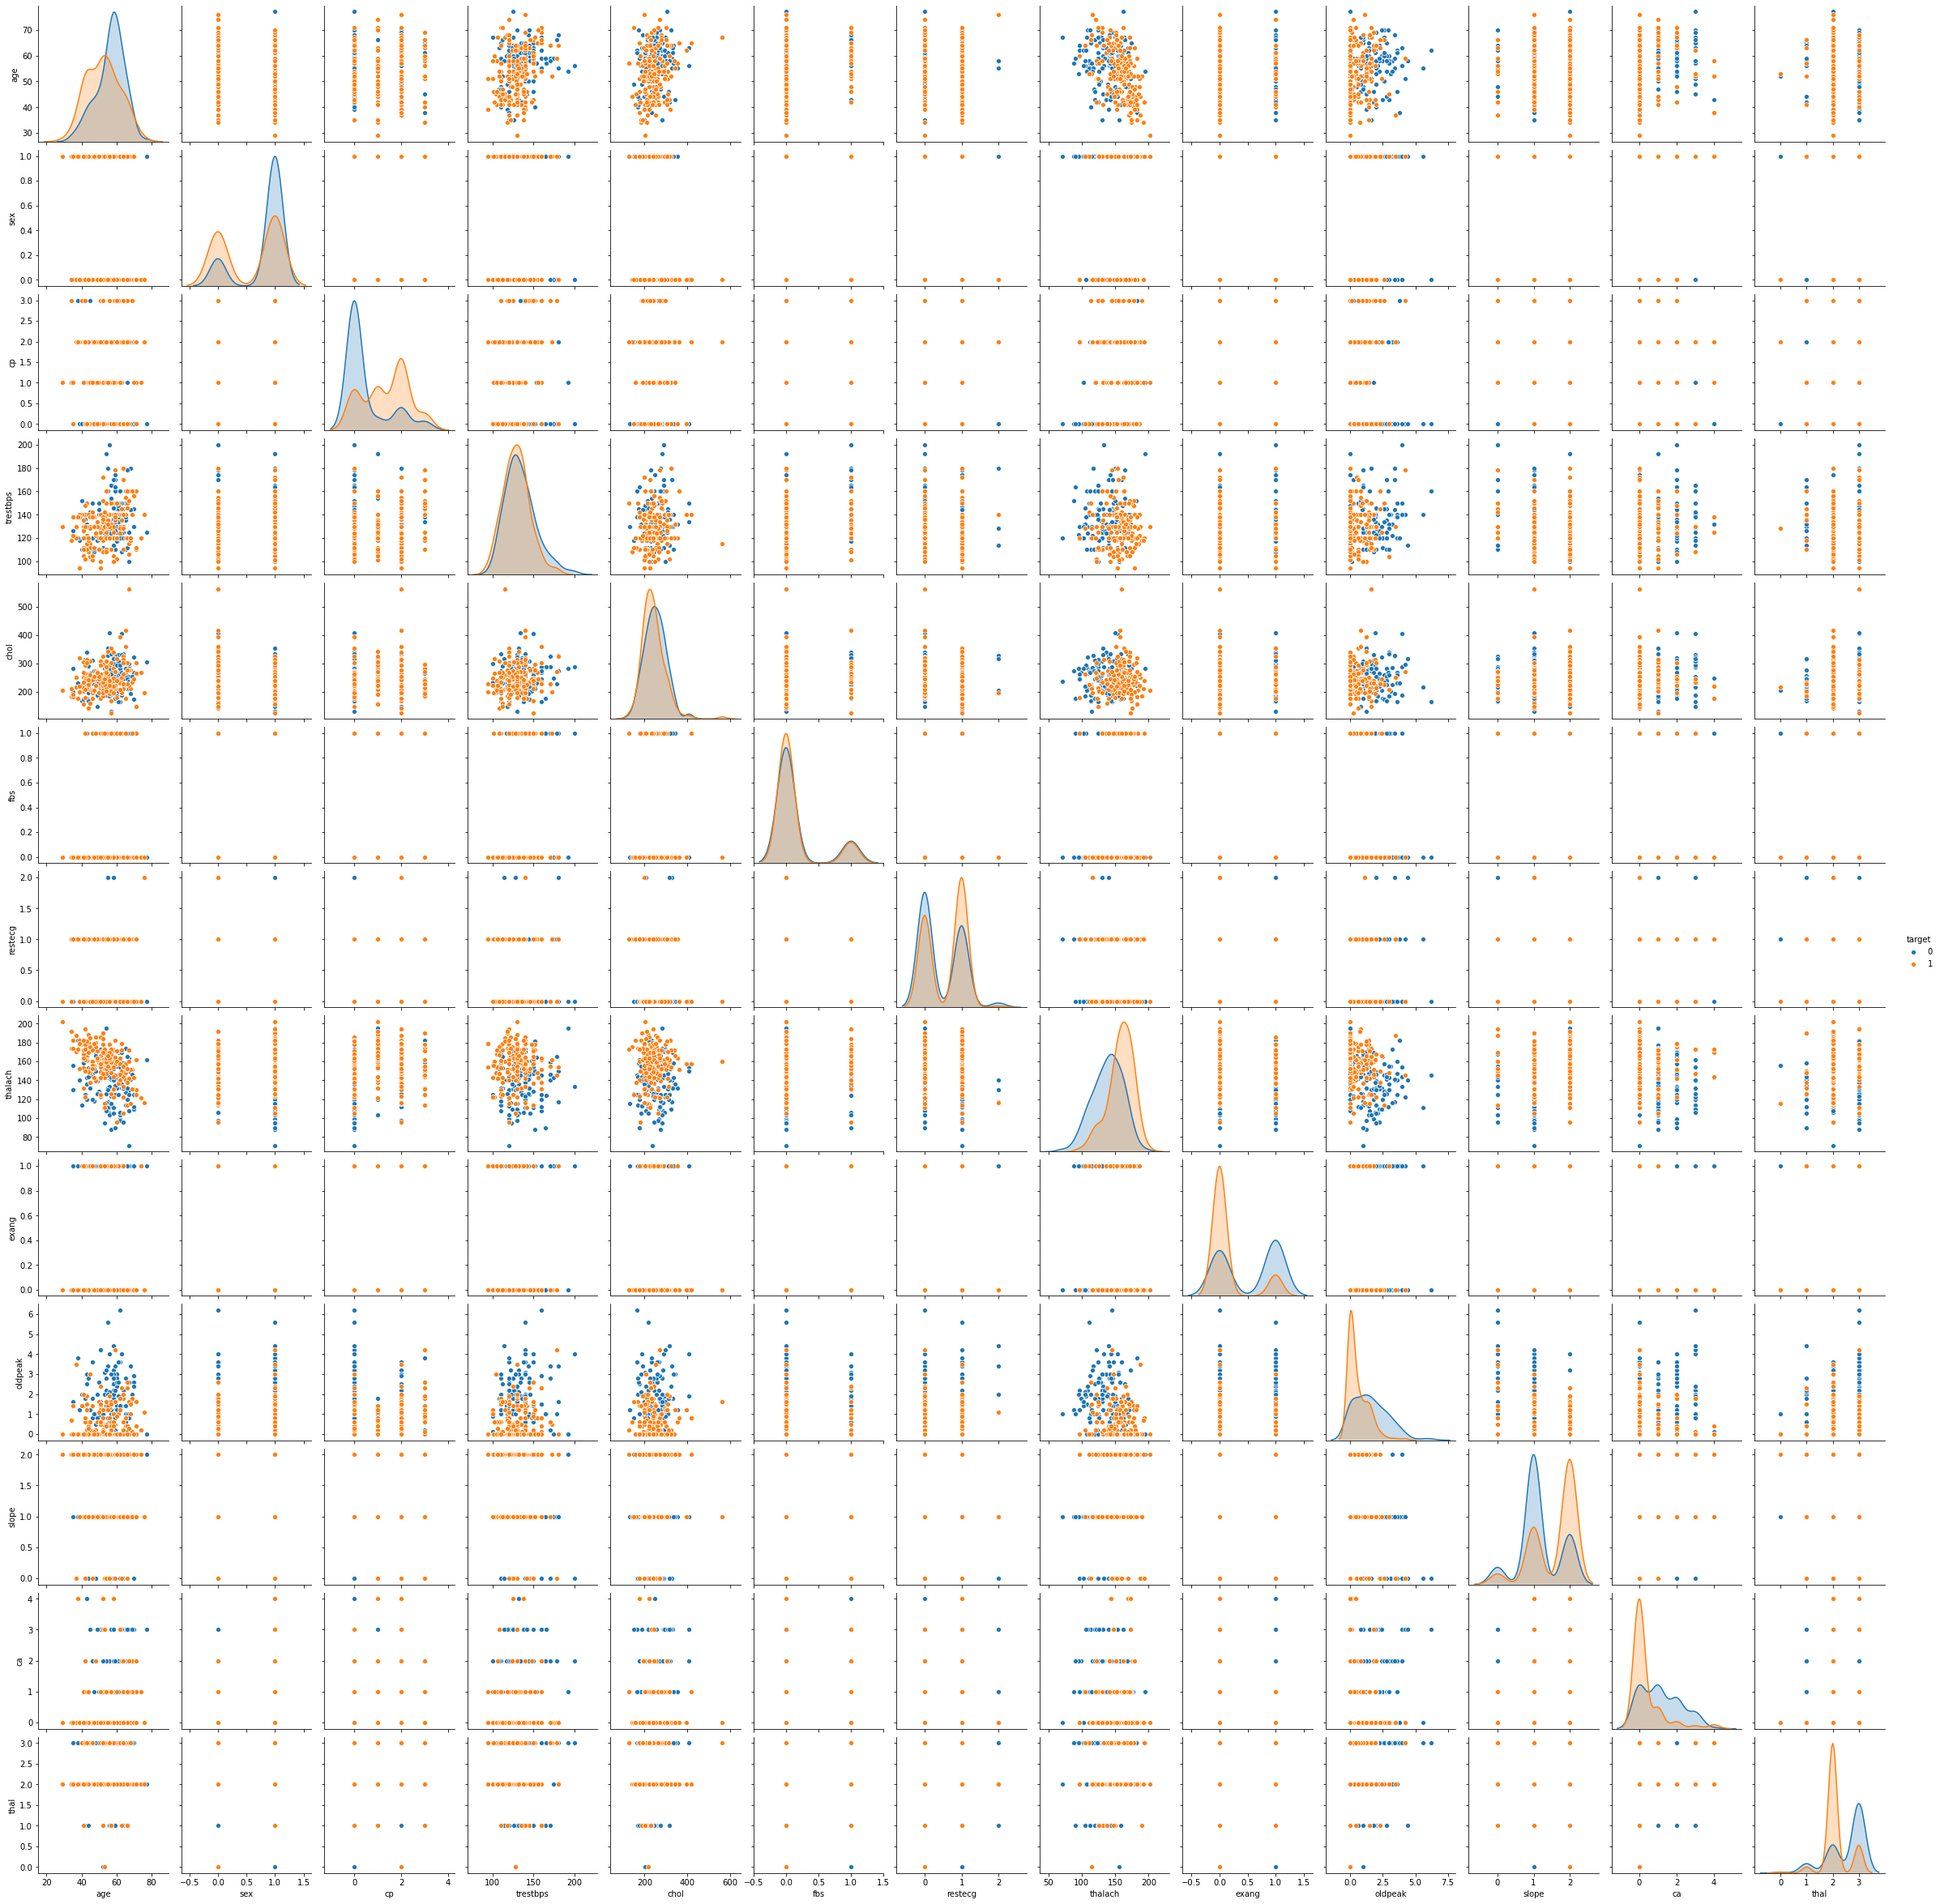

In [9]:
sns.pairplot(df_heart,hue='target')
plt.show()

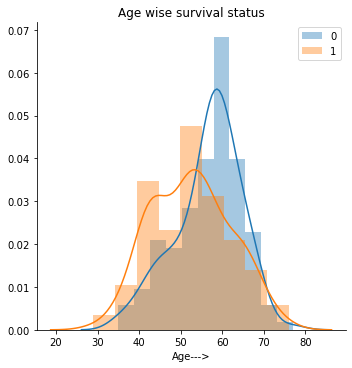

In [10]:
#Univariate Analysis - Histogram with PDF
sns.set_style
('whitegrid')
g=sns.FacetGrid(df_heart,hue='target',height=5)
g=g.map(sns.distplot,'age')
plt.title('Age wise survival status')
plt.xlabel('Age--->')
plt.legend()
plt.show()

In [11]:
tar_corr

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

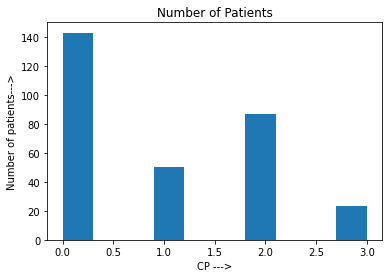

In [12]:
counts, bin_edges = np.histogram(df_heart['cp'], bins=10) 
plt.hist(df_heart['cp'],bins=10,histtype='barstacked') #count 
plt.title('Number of Patients')
plt.xlabel('CP --->')
plt.ylabel('Number of patients--->')
plt.show()

In [13]:
df_heart[(df_heart['cp']==0) & (df_heart['target']==0)].count()

age         104
sex         104
cp          104
trestbps    104
chol        104
fbs         104
restecg     104
thalach     104
exang       104
oldpeak     104
slope       104
ca          104
thal        104
target      104
dtype: int64

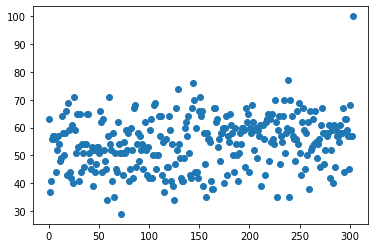

In [14]:
x=np.array(df_heart['age'])
x=np.append(x,[100])
y=np.arange(0,len(df_heart)+1)
plt.scatter(y,x)
plt.show()

<AxesSubplot:>

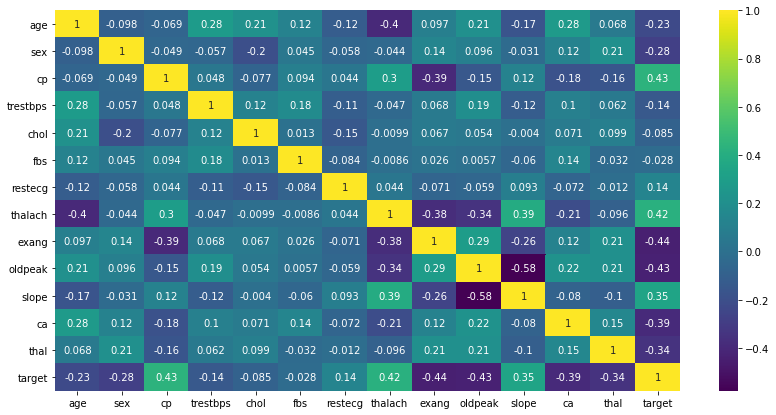

In [15]:
plt.figure(figsize=(14,7))
sns.heatmap(df_heart.corr(),cmap='viridis',annot=True)

In [16]:
np.abs(df_heart.corr()).sort_values(by='target',ascending=False)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
target,0.225439,0.280937,0.433798,0.144931,0.085239,0.028046,0.137230,0.421741,0.436757,0.430696,0.345877,0.391724,0.344029,1.000000
exang,0.096801,0.141664,0.394280,0.067616,0.067023,0.025665,0.070733,0.378812,1.000000,0.288223,0.257748,0.115739,0.206754,0.436757
cp,0.068653,0.049353,1.000000,0.047608,0.076904,0.094444,0.044421,0.295762,0.394280,0.149230,0.119717,0.181053,0.161736,0.433798
oldpeak,0.210013,0.096093,0.149230,0.193216,0.053952,0.005747,0.058770,0.344187,0.288223,1.000000,0.577537,0.222682,0.210244,0.430696
thalach,0.398522,0.044020,0.295762,0.046698,0.009940,0.008567,0.044123,1.000000,0.378812,0.344187,0.386784,0.213177,0.096439,0.421741
ca,0.276326,0.118261,0.181053,0.101389,0.070511,0.137979,0.072042,0.213177,0.115739,0.222682,0.080155,1.000000,0.151832,0.391724
slope,0.168814,0.030711,0.119717,0.121475,0.004038,0.059894,0.093045,0.386784,0.257748,0.577537,1.000000,0.080155,0.104764,0.345877
thal,0.068001,0.210041,0.161736,0.062210,0.098803,0.032019,0.011981,0.096439,0.206754,0.210244,0.104764,0.151832,1.000000,0.344029
sex,0.098447,1.000000,0.049353,0.056769,0.197912,0.045032,0.058196,0.044020,0.141664,0.096093,0.030711,0.118261,0.210041,0.280937
age,1.000000,0.098447,0.068653,0.279351,0.213678,0.121308,0.116211,0.398522,0.096801,0.210013,0.168814,0.276326,0.068001,0.225439


In [17]:
x=np.abs(df_heart.corr()).sort_values(by='target',ascending=False)
x=x.iloc[:,-1]
x

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

<AxesSubplot:>

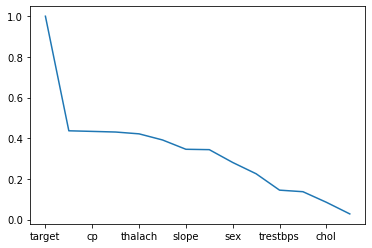

In [18]:
x.plot()

In [19]:
Y=df_heart.target
X=df_heart.drop("target",axis=1)

In [20]:
Y1=df_heart.target
X1=df_heart.drop("target",axis=1)

In [21]:
Y11=df_heart.target
X11=df_heart.drop("target",axis=1)

In [22]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X1['age']=std.fit_transform(X1['age'].values.reshape(-1,1))
X1['trestbps']=std.fit_transform(X1['trestbps'].values.reshape(-1,1))
X1['chol']=std.fit_transform(X1['trestbps'].values.reshape(-1,1))
X1['thalach']=std.fit_transform(X1['trestbps'].values.reshape(-1,1))
X1['oldpeak']=std.fit_transform(X1['trestbps'].values.reshape(-1,1))
X1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,1,3,0.763956,0.763956,1,0,0.763956,0,0.763956,0,0,1
1,-1.915313,1,2,-0.092738,-0.092738,0,1,-0.092738,0,-0.092738,0,0,2
2,-1.474158,0,1,-0.092738,-0.092738,0,0,-0.092738,0,-0.092738,2,0,2
3,0.180175,1,1,-0.663867,-0.663867,0,1,-0.663867,0,-0.663867,2,0,2
4,0.290464,0,0,-0.663867,-0.663867,0,1,-0.663867,1,-0.663867,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,0.478391,0,1,0.478391,1,0.478391,1,0,3
299,-1.033002,1,3,-1.234996,-1.234996,0,1,-1.234996,0,-1.234996,1,0,3
300,1.503641,1,0,0.706843,0.706843,1,1,0.706843,0,0.706843,1,2,3
301,0.290464,1,0,-0.092738,-0.092738,0,1,-0.092738,1,-0.092738,1,1,3


In [23]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
feat=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach' ,'exang', 'oldpeak' ,'slope', 'ca', 'thal']
X11[feat] = scal.fit_transform(X11[feat])
X11.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [24]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=0, stratify=Y) #Train and Test
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)# Train as train and CV

In [25]:
# train test split
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, random_state=0,test_size=0.2) #Train and Test
#X1_train, X1_cv, y1_train, y1_cv = train_test_split(X1_train, y1_train, test_size=0.33, stratify=y1_train)# Train as train and CV

In [26]:
# train test split
from sklearn.model_selection import train_test_split
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, Y11, random_state=0,test_size=0.2) #Train and Test
#X1_train, X1_cv, y1_train, y1_cv = train_test_split(X1_train, y1_train, test_size=0.33, stratify=y1_train)# Train as train and CV

In [28]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k1_lst=[]
acc1_lst=[]
for i in range(1,32):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train,y1_train)
    pred = knn.predict(X1_test)
    acc = accuracy_score(y1_test,pred,normalize=True)*float(100)
    k1_lst.append(i)
    acc1_lst.append(acc)
    
    print("Acc for k=%d is %d" %(i,acc))

Acc for k=1 is 81
Acc for k=2 is 78
Acc for k=3 is 85
Acc for k=4 is 86
Acc for k=5 is 80
Acc for k=6 is 78
Acc for k=7 is 78
Acc for k=8 is 78
Acc for k=9 is 75
Acc for k=10 is 77
Acc for k=11 is 78
Acc for k=12 is 78
Acc for k=13 is 78
Acc for k=14 is 78
Acc for k=15 is 77
Acc for k=16 is 77
Acc for k=17 is 78
Acc for k=18 is 78
Acc for k=19 is 80
Acc for k=20 is 81
Acc for k=21 is 78
Acc for k=22 is 80
Acc for k=23 is 78
Acc for k=24 is 80
Acc for k=25 is 80
Acc for k=26 is 80
Acc for k=27 is 77
Acc for k=28 is 77
Acc for k=29 is 78
Acc for k=30 is 78
Acc for k=31 is 78


In [29]:
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
k1_lst=[]
acc1_lst=[]
for i in range(1,32):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X11_train,y11_train)
    pred = knn.predict(X11_test)
    acc = accuracy_score(y11_test,pred,normalize=True)*float(100)
    k1_lst.append(i)
    acc1_lst.append(acc)
    
    print("Acc for k=%d is %d" %(i,acc))

Acc for k=1 is 85
Acc for k=2 is 83
Acc for k=3 is 86
Acc for k=4 is 86
Acc for k=5 is 86
Acc for k=6 is 85
Acc for k=7 is 90
Acc for k=8 is 86
Acc for k=9 is 85
Acc for k=10 is 85
Acc for k=11 is 81
Acc for k=12 is 81
Acc for k=13 is 80
Acc for k=14 is 83
Acc for k=15 is 83
Acc for k=16 is 81
Acc for k=17 is 80
Acc for k=18 is 80
Acc for k=19 is 78
Acc for k=20 is 81
Acc for k=21 is 78
Acc for k=22 is 80
Acc for k=23 is 78
Acc for k=24 is 78
Acc for k=25 is 77
Acc for k=26 is 80
Acc for k=27 is 78
Acc for k=28 is 78
Acc for k=29 is 78
Acc for k=30 is 78
Acc for k=31 is 78


In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X11_train,y11_train)
pred = knn.predict(X11_test)
acc = accuracy_score(y11_test,pred,normalize=True)*float(100)
acc

90.1639344262295

In [34]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': np.arange(0,100,1)}]


model = GridSearchCV(DecisionTreeClassifier(),tuned_parameters,scoring='accuracy',return_train_score=True)

model.fit(X_train,y_train)
print(model.best_estimator_)
print(model.score(X_test,y_test))

DecisionTreeClassifier(max_depth=60)
0.8032786885245902


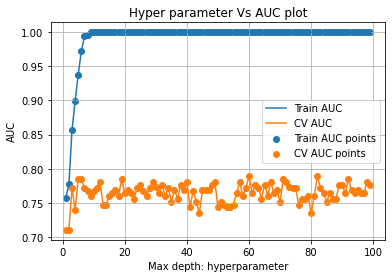

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
82,0.008178,0.001716,0.003990,0.000001,82,{'max_depth': 82},0.877551,0.816327,0.729167,0.687500,...,0.788776,0.069908,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
60,0.006688,0.000981,0.003793,0.000737,60,{'max_depth': 60},0.877551,0.816327,0.770833,0.666667,...,0.788776,0.069908,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.008576,0.001619,0.006185,0.002311,6,{'max_depth': 6},0.877551,0.775510,0.770833,0.666667,...,0.784779,0.070986,3,0.968912,0.974093,0.969072,0.984536,0.963918,0.972106,0.006999
5,0.010772,0.001715,0.005185,0.001930,5,{'max_depth': 5},0.918367,0.734694,0.812500,0.666667,...,0.784779,0.083810,4,0.932642,0.953368,0.938144,0.948454,0.917526,0.938027,0.012597
92,0.005988,0.000886,0.003627,0.000765,92,{'max_depth': 92},0.877551,0.795918,0.750000,0.666667,...,0.784694,0.072455,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [35]:
results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_max_depth'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
Max_depth =  results['param_max_depth']

plt.plot(Max_depth, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(Max_depth, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(Max_depth, train_auc, label='Train AUC points')
plt.scatter(Max_depth, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Max depth: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results=results.sort_values(by='mean_test_score',ascending=False)
results.head()

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
dc=DecisionTreeClassifier(max_depth=50)
dc.fit(X_train,y_train)
pred=dc.predict(X_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))

78.68852459016394
[[22  6]
 [ 7 26]]


In [37]:
from sklearn.linear_model import LogisticRegression


tuned_parameters = [{'C': [10**-4, 10**-2, 10, 100, 150]}]


model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'accuracy',return_train_score=True)

model.fit (X11_train, y11_train)

print(model.best_estimator_) 
print (model.score(X11_train, y11_train)) 

LogisticRegression(C=10)
0.8305785123966942


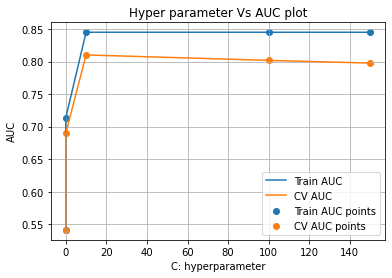

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.018157,0.001940,0.003384,0.000496,10,{'C': 10},0.755102,0.795918,0.875000,0.812500,...,0.810204,0.038599,1,0.875648,0.860104,0.814433,0.835052,0.840206,0.845088,0.021089
3,0.017196,0.001502,0.002803,0.000405,100,{'C': 100},0.755102,0.795918,0.875000,0.791667,...,0.801871,0.039443,2,0.870466,0.860104,0.814433,0.835052,0.845361,0.845083,0.019545
4,0.018008,0.001092,0.004196,0.001465,150,{'C': 150},0.755102,0.795918,0.875000,0.770833,...,0.797704,0.041355,3,0.870466,0.860104,0.814433,0.835052,0.845361,0.845083,0.019545
1,0.008380,0.002325,0.003180,0.000387,0.01,{'C': 0.01},0.714286,0.653061,0.687500,0.708333,...,0.690136,0.021461,4,0.746114,0.709845,0.701031,0.706186,0.706186,0.713872,0.016364
0,0.008577,0.001210,0.003199,0.000392,0.0001,{'C': 0.0001},0.551020,0.530612,0.541667,0.541667,...,0.541327,0.006467,5,0.538860,0.544041,0.541237,0.541237,0.541237,0.541323,0.001642


In [38]:
results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
C =  results['param_C']

plt.plot(C, train_auc, label='Train AUC')

plt.plot(C, cv_auc, label='CV AUC')


plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results=results.sort_values(by='mean_test_score',ascending=False)
results.head()

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
LRclf = LogisticRegression(C=10,penalty='l2')
LRclf.fit(X11_train,y11_train)

pred = LRclf.predict(X11_test)
 
acc = accuracy_score(y11_test,pred)*100
print(acc)
print(confusion_matrix(y11_test,pred))

85.24590163934425
[[21  6]
 [ 3 31]]


In [40]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import SVR

tuned_parameters = [{'C': [10**-4, 10**-2, 10, 50,100,500,700, 10**3]}]
model = GridSearchCV(SVC(),tuned_parameters,scoring='accuracy',return_train_score=True)
model.fit(X11_train,y11_train)
print(model.best_estimator_)
print(model.score(X11_train,y11_train))

SVC(C=50)
0.987603305785124


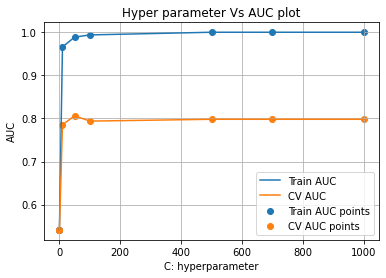

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.006768,0.000729,0.003189,0.000401,50,{'C': 50},0.734694,0.795918,0.833333,0.895833,...,0.806122,0.055209,1,0.989637,0.989637,0.994845,0.974227,0.994845,0.988638,0.007573
5,0.006779,0.000755,0.003385,0.000801,500,{'C': 500},0.734694,0.734694,0.833333,0.895833,...,0.798044,0.061441,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.006210,0.000383,0.003191,0.000400,700,{'C': 700},0.734694,0.734694,0.833333,0.895833,...,0.798044,0.061441,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.006777,0.000968,0.003594,0.000807,1000,{'C': 1000},0.734694,0.734694,0.833333,0.895833,...,0.798044,0.061441,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.008186,0.000742,0.003576,0.000807,100,{'C': 100},0.734694,0.755102,0.833333,0.875000,...,0.793793,0.052297,5,0.994819,0.989637,1.000000,0.989691,0.994845,0.993798,0.003867


In [41]:
results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
C =  results['param_C']

plt.plot(C, train_auc, label='Train AUC')

plt.plot(C, cv_auc, label='CV AUC')


plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results=results.sort_values(by='mean_test_score',ascending=False)
results.head()

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

SVclf = SVC(C=50)
SVclf.fit(X11_train,y11_train)

pred = SVclf.predict(X11_test)

acc = accuracy_score(pred,y11_test)*100

print(acc)

81.9672131147541


0.8524590163934426


<AxesSubplot:>

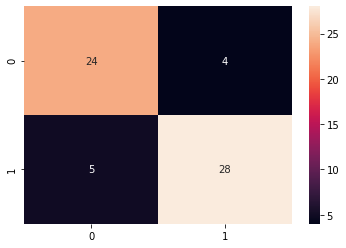

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(accuracy_score(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

<AxesSubplot:>

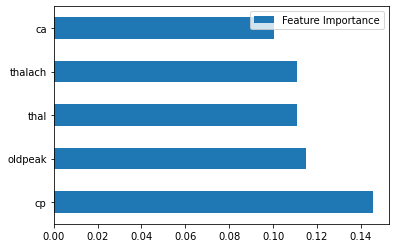

In [44]:
pd.DataFrame(rf.feature_importances_,index=X_train.columns,columns=['Feature Importance']).sort_values("Feature Importance",ascending=False).head(5).plot(kind='barh')

In [45]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[knn],meta_classifier= knn)
scv.fit(X11_train,y11_train)
scv_score=scv.score(X11_test,y11_test)
scv_Y_pred=scv.predict(X11_test)
#print(SVC_score)
accuracy_score(y11_test,scv_Y_pred)

0.5573770491803278

In [47]:
user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
user_input=scal.transform(user_input)
scv_Y_pred=scv.predict(user_input)
if(scv_Y_pred[0]==0):
  print("Warning! You have chances of getting a heart disease!")
else:
  print("You are healthy and are less likely to get a heart disease!")

Enter the values one by one1,1,1,1,1,1,1,1,1,1,1,1,1
You are healthy and are less likely to get a heart disease!


In [48]:
import pickle as pkl
pkl.dump(knn,open("final_model.pkl","wb"))

In [49]:
%%writefile healthyheartapp.py
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
#Load the saved model
model=pkl.load(open("final_model.pkl","rb"))





st.set_page_config(page_title="Healthy Heart App",page_icon="⚕️",layout="centered",initial_sidebar_state="expanded")



def preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal ):   
 
    
    # Pre-processing user input   
    if sex=="male":
        sex=1 
    else: sex=0
    
    
    if cp=="Typical angina":
        cp=0
    elif cp=="Atypical angina":
        cp=1
    elif cp=="Non-anginal pain":
        cp=2
    elif cp=="Asymptomatic":
        cp=2
    
    if exang=="Yes":
        exang=1
    elif exang=="No":
        exang=0
 
    if fbs=="Yes":
        fbs=1
    elif fbs=="No":
        fbs=0
 
    if slope=="Upsloping: better heart rate with excercise(uncommon)":
        slope=0
    elif slope=="Flatsloping: minimal change(typical healthy heart)":
          slope=1
    elif slope=="Downsloping: signs of unhealthy heart":
        slope=2  
 
    if thal=="fixed defect: used to be defect but ok now":
        thal=6
    elif thal=="reversable defect: no proper blood movement when excercising":
        thal=7
    elif thal=="normal":
        thal=2.31

    if restecg=="Nothing to note":
        restecg=0
    elif restecg=="ST-T Wave abnormality":
        restecg=1
    elif restecg=="Possible or definite left ventricular hypertrophy":
        restecg=2


    user_input=[age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    user_input=scal.fit_transform(user_input)
    prediction = model.predict(user_input)

    return prediction

    

       
    # front end elements of the web page 
html_temp = """ 
    <div style ="background-color:pink;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Healthy Heart App</h1> 
    </div> 
    """
      
# display the front end aspect
st.markdown(html_temp, unsafe_allow_html = True) 
st.subheader('by Amlan Mohanty ')
      
# following lines create boxes in which user can enter data required to make prediction
age=st.selectbox ("Age",range(1,121,1))
sex = st.radio("Select Gender: ", ('male', 'female'))
cp = st.selectbox('Chest Pain Type',("Typical angina","Atypical angina","Non-anginal pain","Asymptomatic")) 
trestbps=st.selectbox('Resting Blood Sugar',range(1,500,1))
restecg=st.selectbox('Resting Electrocardiographic Results',("Nothing to note","ST-T Wave abnormality","Possible or definite left ventricular hypertrophy"))
chol=st.selectbox('Serum Cholestoral in mg/dl',range(1,1000,1))
fbs=st.radio("Fasting Blood Sugar higher than 120 mg/dl", ['Yes','No'])
thalach=st.selectbox('Maximum Heart Rate Achieved',range(1,300,1))
exang=st.selectbox('Exercise Induced Angina',["Yes","No"])
oldpeak=st.number_input('Oldpeak')
slope = st.selectbox('Heart Rate Slope',("Upsloping: better heart rate with excercise(uncommon)","Flatsloping: minimal change(typical healthy heart)","Downsloping: signs of unhealthy heart"))
ca=st.selectbox('Number of Major Vessels Colored by Flourosopy',range(0,5,1))
thal=st.selectbox('Thalium Stress Result',range(1,8,1))



#user_input=preprocess(sex,cp,exang, fbs, slope, thal )
pred=preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal)




if st.button("Predict"):    
  if pred[0] == 0:
    st.error('Warning! You have high risk of getting a heart attack!')
    
  else:
    st.success('You have lower risk of getting a heart disease!')
    
   



st.sidebar.subheader("About App")

st.sidebar.info("This web app is helps you to find out whether you are at a risk of developing a heart disease.")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether you have a healthy heart")
st.sidebar.info("Don't forget to rate this app")



feedback = st.sidebar.slider('How much would you rate this app?',min_value=0,max_value=5,step=1)

if feedback:
  st.header("Thank you for rating the app!")
  st.info("Caution: This is just a prediction and not doctoral advice. Kindly see a doctor if you feel the symptoms persist.") 


Overwriting healthyheartapp.py
